### Maddie Bauer
### DSC 550
### Original Case Study Project
### Topic: Analyze Features of Songs from Spotify to Understand a Song’s Popularity

#### Part 1: Graph Analysis

In [1]:
import pandas as pd
import yellowbrick

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# Step 1:  Load data into a dataframe
df = pd.read_csv(r'/Users/madelinebauer/top10s.csv', encoding= 'unicode_escape')

In [3]:
# Step 2:  Check the dimension of the dataframe
print("The dimension of the dataframe is: ", df.shape)

The dimension of the dataframe is:  (603, 15)


In [4]:
#Step 3:  Look at the data
df.head(10)

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
5,6,Baby,Justin Bieber,canadian pop,2010,65,86,73,-5,11,54,214,4,14,77
6,7,Dynamite,Taio Cruz,dance pop,2010,120,78,75,-4,4,82,203,0,9,77
7,8,Secrets,OneRepublic,dance pop,2010,148,76,52,-6,12,38,225,7,4,77
8,9,Empire State of Mind (Part II) Broken Down,Alicia Keys,hip pop,2010,93,37,48,-8,12,14,216,74,3,76
9,10,Only Girl (In The World),Rihanna,barbadian pop,2010,126,72,79,-4,7,61,235,13,4,73


In [5]:
# What type of variables are in the table 
print("Describe Data")
print(df.describe())
print("\nSummarized Data")
print(df.describe(include=['O']))

Describe Data
       Unnamed: 0         year         bpm        nrgy        dnce  \
count  603.000000   603.000000  603.000000  603.000000  603.000000   
mean   302.000000  2014.592040  118.545605   70.504146   64.379768   
std    174.215384     2.607057   24.795358   16.310664   13.378718   
min      1.000000  2010.000000    0.000000    0.000000    0.000000   
25%    151.500000  2013.000000  100.000000   61.000000   57.000000   
50%    302.000000  2015.000000  120.000000   74.000000   66.000000   
75%    452.500000  2017.000000  129.000000   82.000000   73.000000   
max    603.000000  2019.000000  206.000000   98.000000   97.000000   

               dB        live         val         dur       acous        spch  \
count  603.000000  603.000000  603.000000  603.000000  603.000000  603.000000   
mean    -5.578773   17.774461   52.225539  224.674959   14.326700    8.358209   
std      2.798020   13.102543   22.513020   34.130059   20.766165    7.483162   
min    -60.000000    0.000000  

In [6]:
# View how many songs from each year
print(df['year'].value_counts())


2015    95
2016    80
2013    71
2017    65
2018    64
2014    58
2011    53
2010    51
2012    35
2019    31
Name: year, dtype: int64


In [7]:
# Check for missing values in df
for c in df.columns:
    miss = df[c].isnull().sum()
    if miss > 0:
        print("{} has {} missing value(s)".format(c, miss))
    else:
        print("{} has NO missing values.".format(c))
            

Unnamed: 0 has NO missing values.
title has NO missing values.
artist has NO missing values.
top genre has NO missing values.
year has NO missing values.
bpm has NO missing values.
nrgy has NO missing values.
dnce has NO missing values.
dB has NO missing values.
live has NO missing values.
val has NO missing values.
dur has NO missing values.
acous has NO missing values.
spch has NO missing values.
pop has NO missing values.


In [8]:
# Checking the column names
print(df.columns)

Index(['Unnamed: 0', 'title', 'artist', 'top genre', 'year', 'bpm', 'nrgy',
       'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop'],
      dtype='object')


In [9]:
# Dropping the first column becuase it's not needed
del df['Unnamed: 0']

In [10]:
# Checking the column names
print(df.columns)

Index(['title', 'artist', 'top genre', 'year', 'bpm', 'nrgy', 'dnce', 'dB',
       'live', 'val', 'dur', 'acous', 'spch', 'pop'],
      dtype='object')


In [11]:
# checking the structure of each variable
df.dtypes

title        object
artist       object
top genre    object
year          int64
bpm           int64
nrgy          int64
dnce          int64
dB            int64
live          int64
val           int64
dur           int64
acous         int64
spch          int64
pop           int64
dtype: object

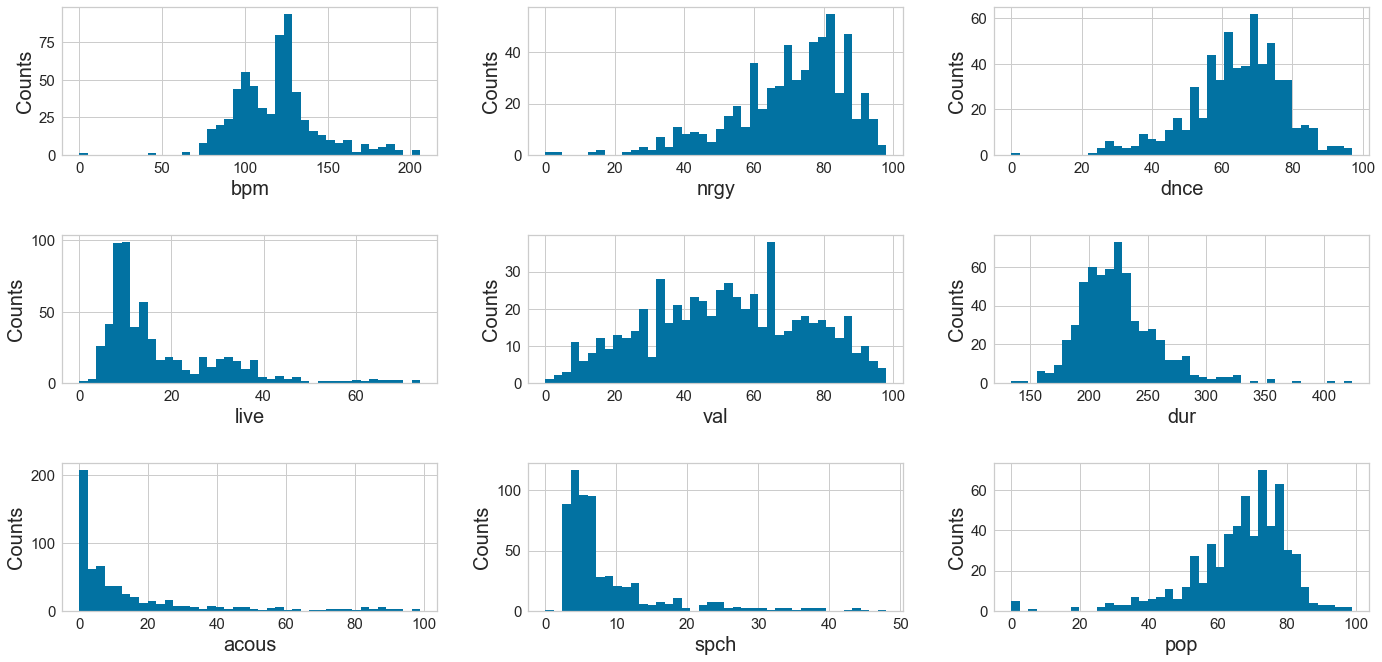

In [12]:
#Step 4: View distributions 
import matplotlib.pyplot as plt

# set up the figure size
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 3, ncols = 3)

# Specify the features of interest
features = ['bpm', 'nrgy', 'dnce', 'live', 'val', 'dur', 'acous', 'spch', 'pop']
x_axes = features
y_axes = ['Counts', 'Counts', 'Counts', 'Counts', 'Counts', 'Counts', 'Counts', 'Counts', 'Counts']

# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(df[features[idx]], bins=40)
    ax.set_xlabel(x_axes[idx], fontsize=20)
    ax.set_ylabel(y_axes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
    # space out subplots so you can read the x-axis labels
    fig.tight_layout(pad=3.0)
plt.show()

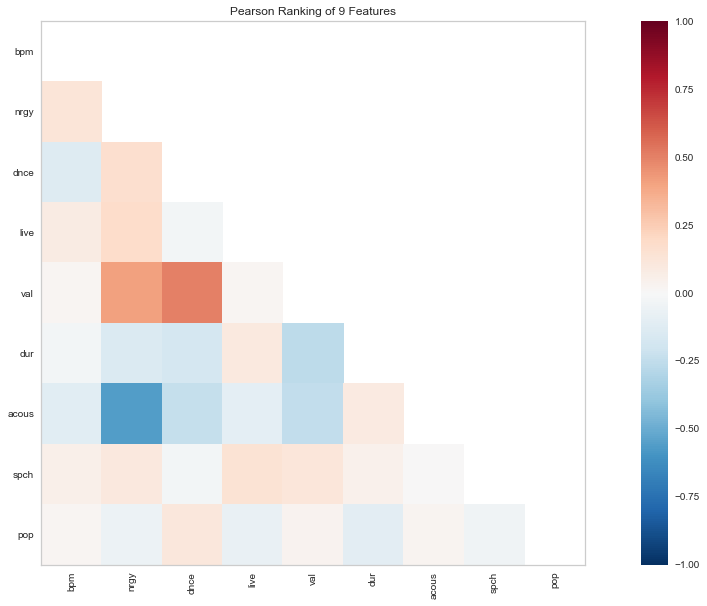

In [13]:
#Step 5: Pearson Ranking Charts

#%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

# import the package for visulization of the correlation
from yellowbrick.features import Rank2D

# extract the numpy arrays from the data frame
import numpy as np
X = np.asmatrix(df[features])

# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof() # Draw/show/poof the data
plt.show()

In [14]:
# Step 8:  Create Bar Charts
# group data by genre
x_1=df.groupby('top genre')
# find the mean pop score for each genre
y_1=x_1['pop'].mean()
# create new df with genres and avg pop score
new_df = pd.DataFrame(y_1)

In [15]:
# reset index of df
df2 = new_df.reset_index()

In [16]:
# view df
df2.head()

,top genre,pop
0,acoustic pop,58.50
1,alaska indie,36.00
2,alternative r&b,84.00
3,art pop,62.75
4,atl hip hop,50.00


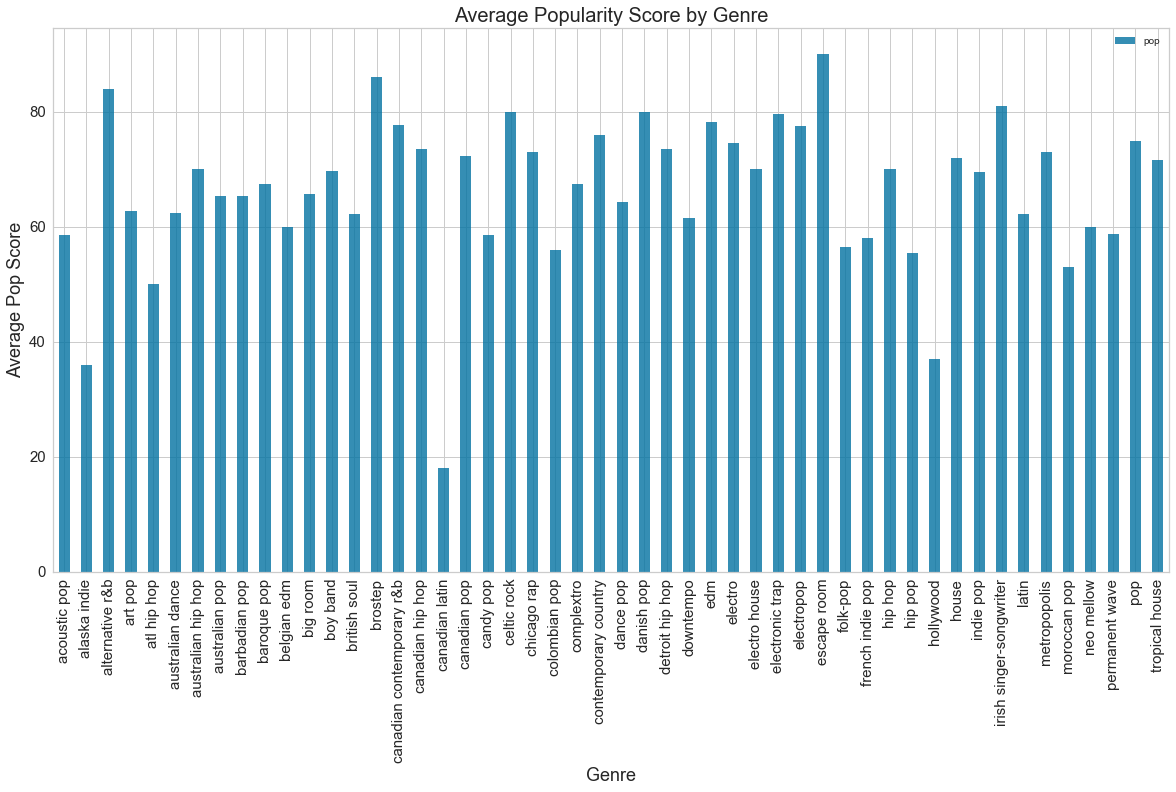

In [17]:
# create bar chart
df2.plot(x = 'top genre', y = "pop", kind = "bar", alpha=0.8)

# Create labels on axes & change size
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel('Genre', fontsize=18)
plt.ylabel('Average Pop Score', fontsize=18)
plt.title("Average Popularity Score by Genre", fontsize=20)
plt.show()

In [18]:
# group data by year
x_2=df.groupby('year')

# find the mean pop score for each year
y_2=x_2['pop'].mean()

# create new df with years and avg pop score
years = pd.DataFrame(y_2)

# reset index of df
df3 = years.reset_index()

# view df3
df3

,year,pop
0,2010,64.254902
1,2011,61.867925
2,2012,67.771429
3,2013,63.985915
4,2014,62.706897
5,2015,64.568421
6,2016,64.162500
7,2017,69.015385
8,2018,72.437500
9,2019,84.354839


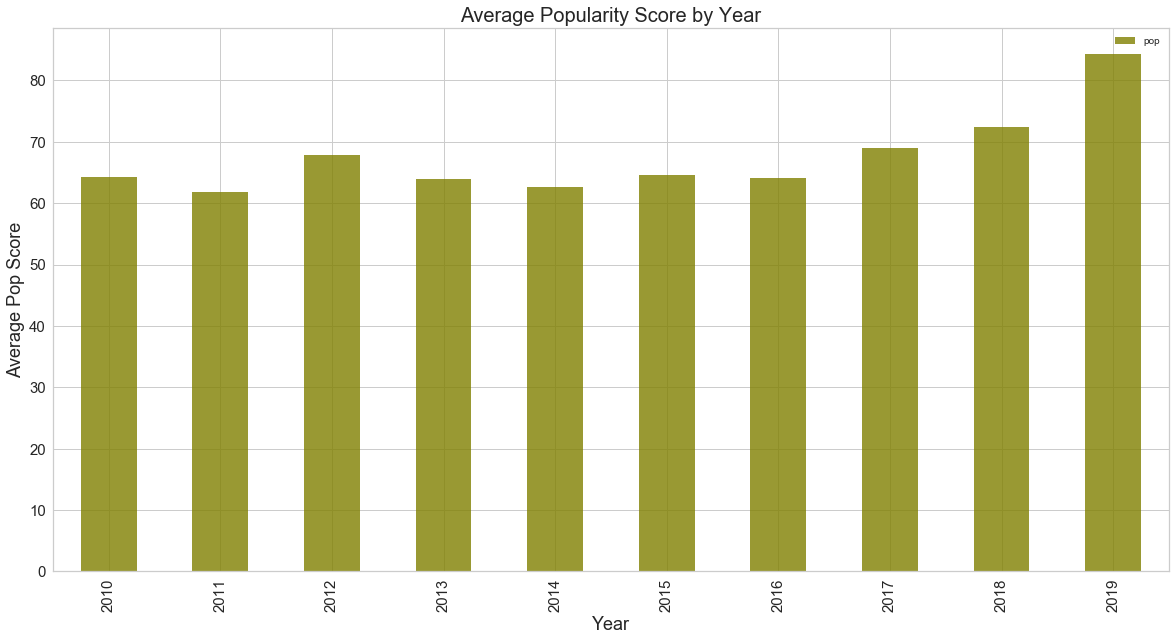

In [19]:
# create second bar chart
df3.plot(x = 'year', y = "pop", kind = "bar", alpha=0.8, color='olive')

# Create labels on axes & change size
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Average Pop Score', fontsize=18)
plt.title("Average Popularity Score by Year", fontsize=20)
plt.show()

In [20]:
# use seaborn to create visualizations too
import seaborn as sns

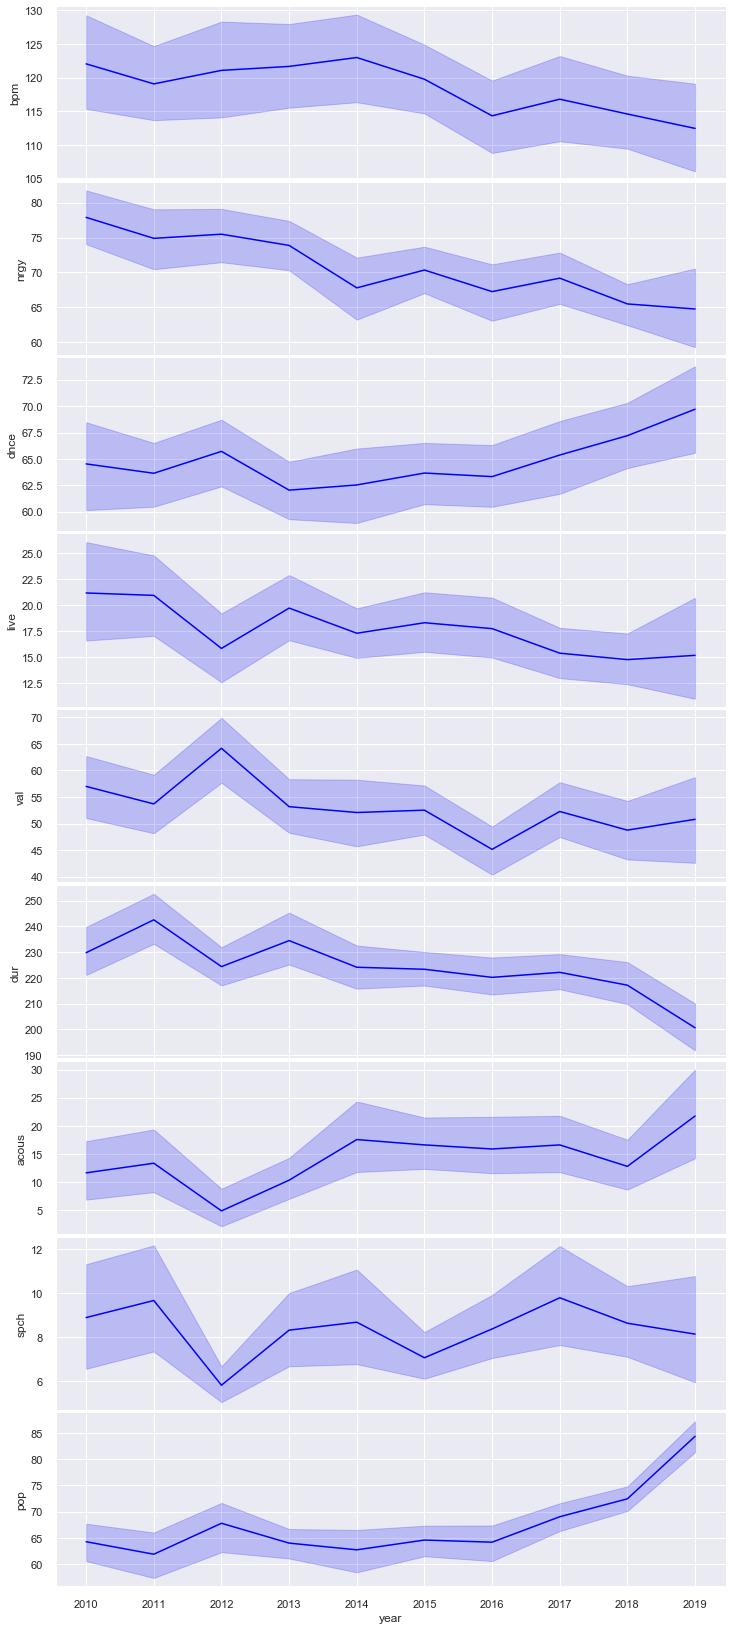

In [21]:
# PairGrid to analyze trends in all features over the years

sns.set()

g = sns.PairGrid(df, y_vars = features , x_vars = ['year'], aspect = 4)

g = g.map(sns.lineplot, color="blue")

# Adjust the tick positions and labels
years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
g.set(xticks=years)

# Arrange the plots
g.fig.subplots_adjust(wspace=.02, hspace=.02);

g.savefig("plot.png")

##### From this plot I am noticing the following:
    1. bpm (tempo) is slightly descreasing over time
    2. energy is consistently decreasing over time
    3. danceability is consistently increasing over time
    4. valence (mood) is consistent over time
    5. duration is consistently decreasing
    6. acousticness is consistently increasing over time
    5. popularity is consistently increasing over time

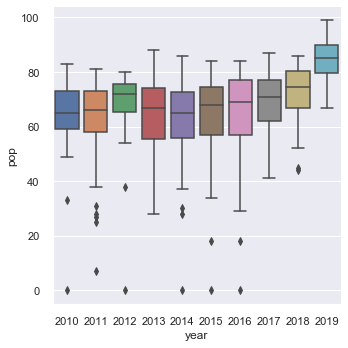

In [22]:
# view spread of popularity score over the years

sns.catplot(y = "pop", x = "year", kind = "box", data = df)


Based on the spread of the popularity score over the years I am wondering if it is accurate and reliable?

#### Part 2: Dimensionality Reduction & Feature Reduction


In [23]:
# I have already checked for missing values. There are none that need to be taken care of.
# I have already dropped a column that is of no use.

In [24]:
import numpy as np

In [25]:
# Step 9: Log transformations
# Based on histograms, acous & spch are skewed
# log-transformation method using numpy
def log_transformation(df):
    return df.apply(np.log1p)

# perform log transformation for acous
df['acous_log'] = log_transformation(df['acous'])

# perform log transofrmation for spch
df['spch_log'] = log_transformation(df['spch'])

# view the summary stats
print(df.describe())

              year         bpm        nrgy        dnce          dB  \
count   603.000000  603.000000  603.000000  603.000000  603.000000   
mean   2014.592040  118.545605   70.504146   64.379768   -5.578773   
std       2.607057   24.795358   16.310664   13.378718    2.798020   
min    2010.000000    0.000000    0.000000    0.000000  -60.000000   
25%    2013.000000  100.000000   61.000000   57.000000   -6.000000   
50%    2015.000000  120.000000   74.000000   66.000000   -5.000000   
75%    2017.000000  129.000000   82.000000   73.000000   -4.000000   
max    2019.000000  206.000000   98.000000   97.000000   -2.000000   

             live         val         dur       acous        spch         pop  \
count  603.000000  603.000000  603.000000  603.000000  603.000000  603.000000   
mean    17.774461   52.225539  224.674959   14.326700    8.358209   66.520730   
std     13.102543   22.513020   34.130059   20.766165    7.483162   14.517746   
min      0.000000    0.000000  134.000000    

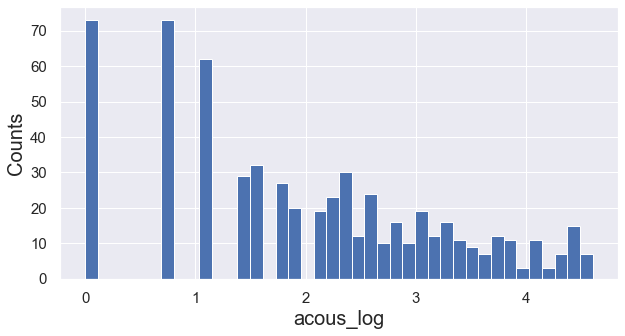

In [26]:
# View the distribution of new feature
plt.rcParams['figure.figsize'] = (10, 5)
plt.hist(df['acous_log'], bins=40)
plt.xlabel('acous_log', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.tick_params(axis='both', labelsize=15)
plt.show()

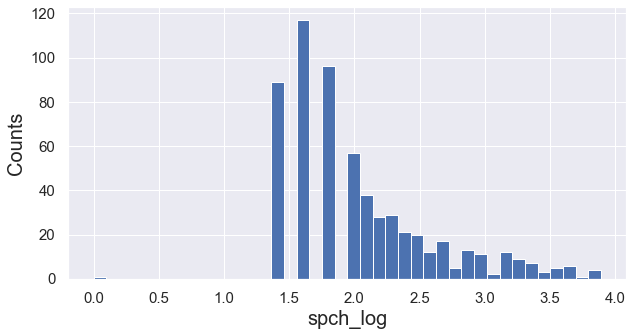

In [27]:
# View the distribution of new feature
plt.rcParams['figure.figsize'] = (10, 5)
plt.hist(df['spch_log'], bins=40)
plt.xlabel('spch_log', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.tick_params(axis='both', labelsize=15)
plt.show()

In [28]:
# Step 10: view the variance of features
# low variance = values are pretty much always the same (bad predictors)
# high variance = explain what's happening
df.var()

year            6.796747
bpm           614.809794
nrgy          266.037773
dnce          178.990088
dB              7.828917
live          171.676622
val           506.836091
dur          1164.860950
acous         431.233621
spch           55.997719
pop           210.764935
acous_log       1.609541
spch_log        0.335319
dtype: float64

In [29]:
# Step 11: view correlation with target variable 'pop'
df.corr()['pop']


year         0.241261
bpm          0.018983
nrgy        -0.057645
dnce         0.116054
dB           0.156897
live        -0.075749
val          0.038953
dur         -0.104363
acous        0.026704
spch        -0.041490
pop          1.000000
acous_log    0.080561
spch_log    -0.005666
Name: pop, dtype: float64

In [30]:
# Break data into object not including text or song number
data_values = df[["pop", "spch", "bpm", "nrgy", "dnce", "live", "val", "dur", "acous"]]
print("The dimension of the details table is: ", data_values.shape)

The dimension of the details table is:  (603, 9)


In [31]:
# Feature Selection with Univariate Statistical Tests
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, f_regression, chi2

# Create feature and target variable 
X_reg = data_values.iloc[:,1:9]
Y_reg = data_values.iloc[:,0]
# feature extraction
regression_new = SelectKBest(score_func=f_regression, k=4).fit_transform(X_reg, Y_reg)
print(regression_new[:5])
print(X_reg.head())
print(" \nThe new shape of the data is: ", X_reg.shape)

[[ 89  67   8 217]
 [ 93  75  52 263]
 [ 84  76  29 200]
 [ 92  70   8 295]
 [ 84  64   9 221]]
   spch  bpm  nrgy  dnce  live  val  dur  acous
0     4   97    89    67     8   80  217     19
1    23   87    93    75    52   64  263     24
2    14  120    84    76    29   71  200     10
3     4  119    92    70     8   71  295      0
4     4  109    84    64     9   43  221      2
 
The new shape of the data is:  (603, 8)


In [32]:
# Normalization and PCA
df.describe()

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,acous_log,spch_log
count,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
mean,2014.592040,118.545605,70.504146,64.379768,-5.578773,17.774461,52.225539,224.674959,14.326700,8.358209,66.520730,1.957540,2.035763
std,2.607057,24.795358,16.310664,13.378718,2.798020,13.102543,22.513020,34.130059,20.766165,7.483162,14.517746,1.268677,0.579068
min,2010.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,134.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2013.000000,100.000000,61.000000,57.000000,-6.000000,9.000000,35.000000,202.000000,2.000000,4.000000,60.000000,1.098612,1.609438
50%,2015.000000,120.000000,74.000000,66.000000,-5.000000,12.000000,52.000000,221.000000,6.000000,5.000000,69.000000,1.945910,1.791759
75%,2017.000000,129.000000,82.000000,73.000000,-4.000000,24.000000,69.000000,239.500000,17.000000,9.000000,76.000000,2.890372,2.302585
max,2019.000000,206.000000,98.000000,97.000000,-2.000000,74.000000,98.000000,424.000000,99.000000,48.000000,99.000000,4.605170,3.891820


In [33]:
df.columns

Index(['title', 'artist', 'top genre', 'year', 'bpm', 'nrgy', 'dnce', 'dB',
       'live', 'val', 'dur', 'acous', 'spch', 'pop', 'acous_log', 'spch_log'],
      dtype='object')

In [34]:
# drop title, artist and year columns
df2 = df.drop(columns = ['title', "artist", "year", "top genre", 'acous_log', 'spch_log'])
df2.head()

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,97,89,67,-4,8,80,217,19,4,83
1,87,93,75,-5,52,64,263,24,23,82
2,120,84,76,-3,29,71,200,10,14,80
3,119,92,70,-4,8,71,295,0,4,79
4,109,84,64,-5,9,43,221,2,4,78


In [35]:
# normalize data between 0 and 1 in order to help with PCA and regression
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df3 = scaler.fit_transform(df2)
df3 = pd.DataFrame(df3, columns = df2.columns)
df3.describe()

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
mean,0.575464,0.719430,0.663709,0.938297,0.240195,0.532914,0.312672,0.144714,0.174129,0.671927
std,0.120366,0.166435,0.137925,0.048242,0.177061,0.229725,0.117690,0.209759,0.155899,0.146644
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.485437,0.622449,0.587629,0.931034,0.121622,0.357143,0.234483,0.020202,0.083333,0.606061
50%,0.582524,0.755102,0.680412,0.948276,0.162162,0.530612,0.300000,0.060606,0.104167,0.696970
75%,0.626214,0.836735,0.752577,0.965517,0.324324,0.704082,0.363793,0.171717,0.187500,0.767677
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
# use PCA to reduce feature columns
from sklearn.decomposition import PCA
pca = PCA().fit(df3)

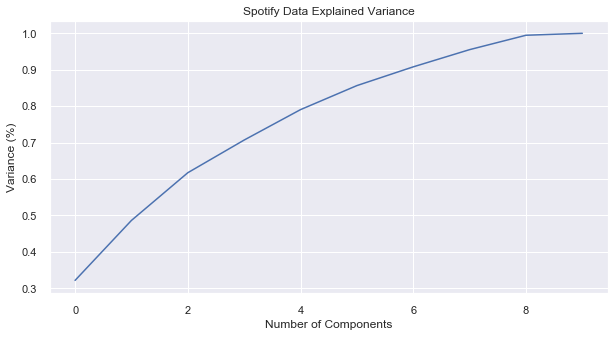

In [37]:
# plot the explained variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') 
plt.title('Spotify Data Explained Variance')
plt.show()

Explained variance increases as the number of components increases. I will use 8 components.

In [38]:
pca = PCA(n_components = 8)
data_pca = pca.fit_transform(df3)

In [39]:
# view data_pca
data_pca

array([[-0.23481564, -0.24238856, -0.08557137, ..., -0.10214289,
        -0.18898637,  0.09691716],
       [-0.20530738,  0.08762022,  0.52175389, ...,  0.14152939,
        -0.23074343,  0.09936112],
       [-0.2783701 , -0.04228022,  0.15356129, ...,  0.00137348,
        -0.0481817 , -0.05102214],
       ...,
       [-0.1375038 , -0.00269713,  0.18687161, ...,  0.03182386,
         0.04976818,  0.10473202],
       [ 0.06380548,  0.39794938,  0.09525555, ...,  0.03496563,
        -0.06990713, -0.09249215],
       [ 0.25963986,  0.1122444 , -0.17390106, ...,  0.09162758,
         0.2575161 , -0.11889911]])

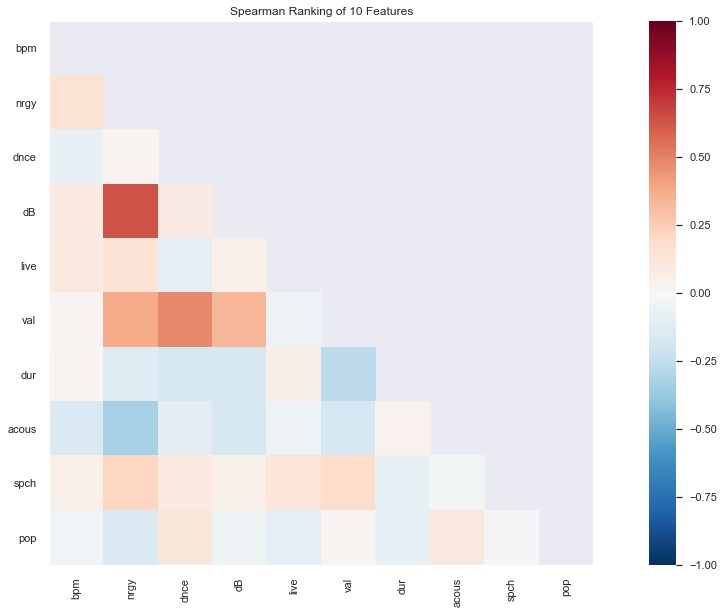

In [40]:
# View Spearman correlation between features

#%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

X = np.asmatrix(df3)

# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=df2.columns, algorithm='spearman')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof() # Draw/show/poof the data
plt.show()

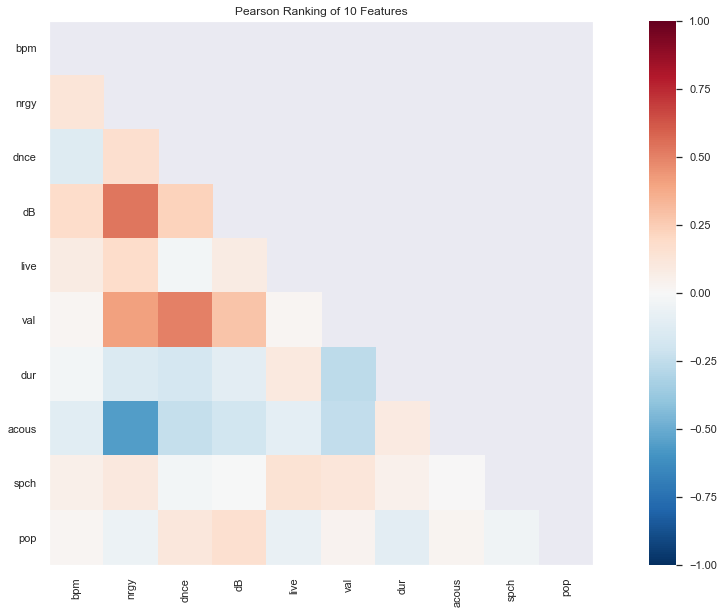

In [41]:
# View Pearson correlation between features

#%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

X = np.asmatrix(df3)

# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=df2.columns, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof() # Draw/show/poof the data
plt.show()

#### Part 3: Model Evaluation & Selection

/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


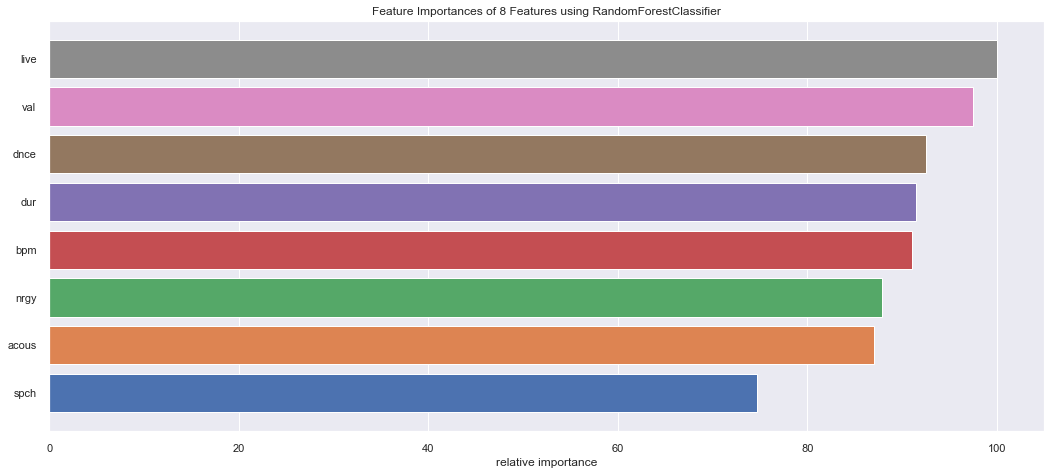

In [42]:
# Run this to display plots inline
%matplotlib inline
# set the size of the figure and the font size 
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Prep features and target for use
X = data_values.iloc[:,1:10]
y = data_values.iloc[:,0]

# Import model and visualizer
from yellowbrick.model_selection import FeatureImportances
from sklearn.ensemble import RandomForestClassifier# Instantiate model and visualizer

model = RandomForestClassifier(n_estimators=10, random_state=1)
visualizer = FeatureImportances(model)# Fit and display visualizer
visualizer.fit(X, y)
visualizer.show()

/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


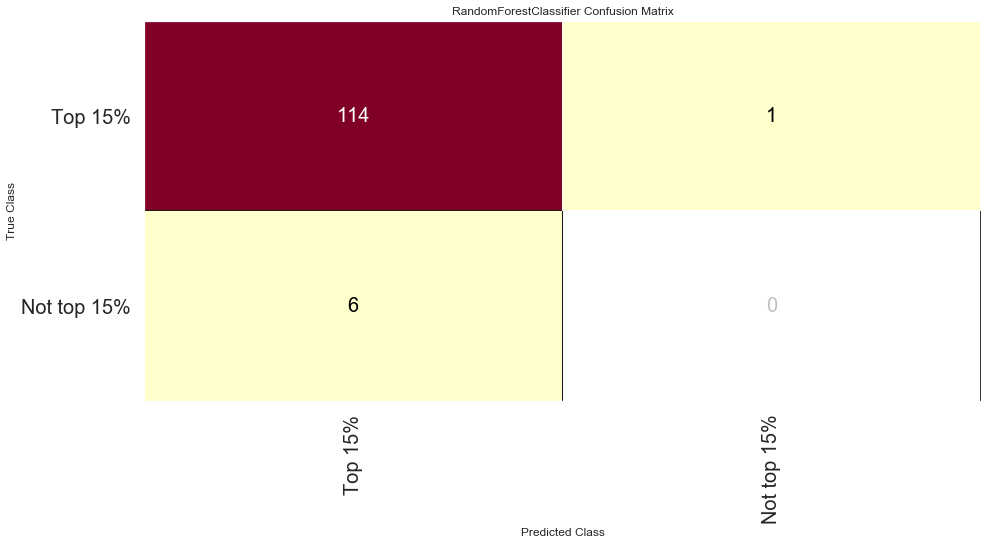

In [43]:
# Import what we need
from sklearn.model_selection import train_test_split
from yellowbrick.classifier import ConfusionMatrix

# Split the data for validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# set the size of the figure and the font size 
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

model = RandomForestClassifier(n_estimators=10, random_state=1)
matrix = ConfusionMatrix(model, classes=['Top 15%', 'Not top 15%'])
y_train = y_train.apply(lambda x: 'Top 15%' if x >= 85 else 'Not top 15%')
y_test = y_test.apply(lambda x: 'Top 15%' if x >= 85 else 'Not top 15%')
# Fit, score, and display the visualizer
matrix.fit(X_train, y_train)
matrix.score(X_test, y_test)
matrix.show()

In [44]:
# Number of samples in each set
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in testing set:", X_test.shape[0])

# Top 15% and not top 15% of popularity songs
print('\n')
print('No. of songs in the top 15% of pop in the training set:')
print(y_train.value_counts())

print('\n')
print('No. of songs in the top 15% of pop in the testing set:')
print(y_test.value_counts())

No. of samples in training set:  482
No. of samples in testing set: 121


No. of songs in the top 15% of pop in the training set:
Not top 15%    462
Top 15%         20
Name: pop, dtype: int64


No. of songs in the top 15% of pop in the testing set:
Not top 15%    115
Top 15%          6
Name: pop, dtype: int64


/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


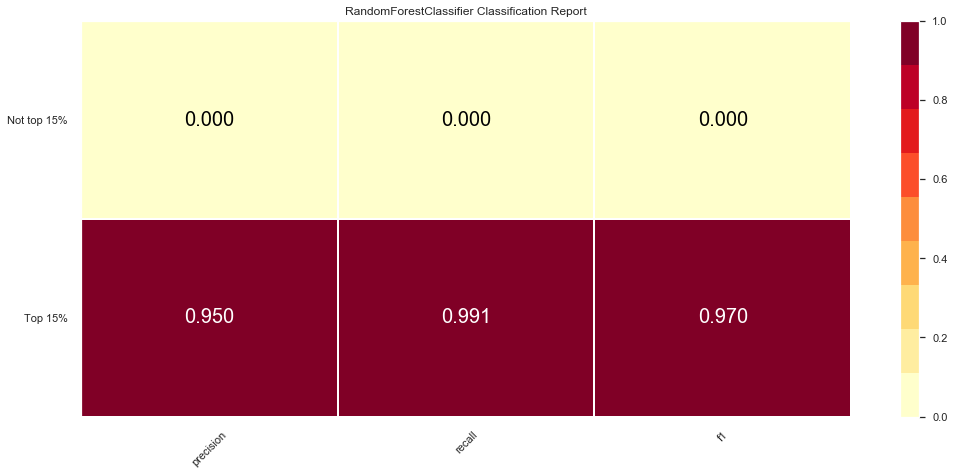

In [45]:
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC
# set the size of the figure and the font size 
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20
# Precision, Recall, and F1 Score
# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=['Top 15%', 'Not top 15%'])
# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)  
# Evaluate the model on the test data
visualizer.score(X_test, y_test)  
g = visualizer.poof()

/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


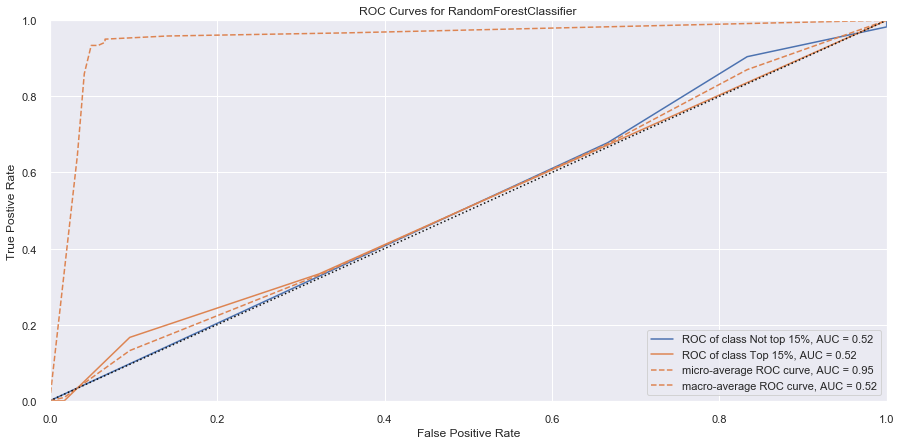

In [46]:
# set the size of the figure and the font size 
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20
# ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()

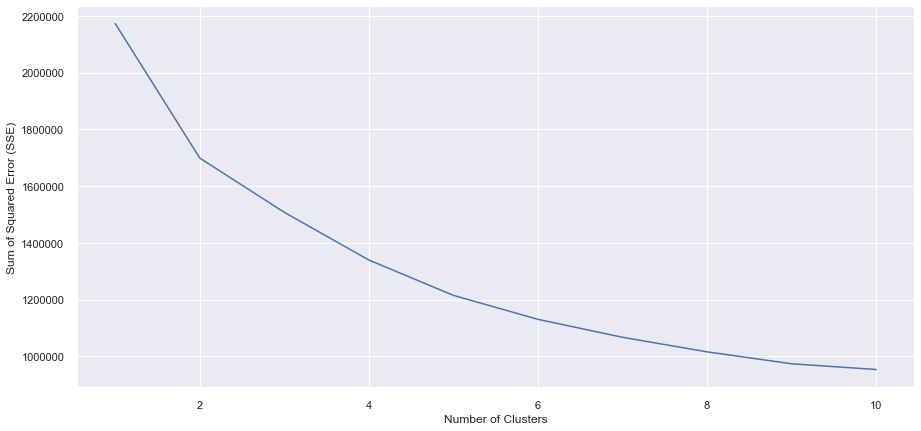

In [47]:
from sklearn.cluster import KMeans

# empty dict for sum of squared errors
sse = {}

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df2)
    df2["clusters"] = kmeans.labels_
    #Sum of distances of samples to their closest cluster center
    sse[k] = kmeans.inertia_  

plt.figure()
# change dict key, value pairs to lists to plot
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squared Error (SSE)")
plt.show()

In [48]:
# use k = 2 for the 'elbow curve'
kmeans = KMeans(n_clusters=2, max_iter=1000).fit(df2)
df2["clusters"] = kmeans.labels_
df2.groupby(by=['clusters']).mean()

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
clusters,,,,,,,,,,
0,113.791139,59.645570,58.107595,-6.689873,18.177215,35.708861,264.867089,26.284810,8.044304,65.126582
1,120.233708,74.359551,66.606742,-5.184270,17.631461,58.089888,210.404494,10.080899,8.469663,67.015730


In [49]:
# Find similar songs

def similar_songs(data, song_feat):
    df_new = data
    features = ['bpm','nrgy','dnce', 'dB', 'live', 'val', 'dur', 'acous','spch']
    for feature in features:
        df_new = df_new[(abs(df_new[feature] - song_feat[feature]) < 15)]
    return df_new

In [50]:
# use function to find similar songs to a randomly chosen song (Club Can't Handle Me)

random_song = df2.iloc[10]
sim_songs = similar_songs(df2, random_song)
print(sim_songs)

     bpm  nrgy  dnce  dB  live  val  dur  acous  spch  pop  clusters
10   128    87    62  -4     6   47  235      3     3   73         1
28   120    80    72  -5    13   59  228      2     4   63         1
120  128    84    60  -5     7   53  228      0     6   72         1
177  120    78    68  -6    12   40  230     13     4   65         1
201  128    75    72  -4    13   50  229      4     4   46         1
206  127    83    67  -4    16   58  230     10     7   41         1
254  125    94    60  -4    10   55  222      0     7   56         1
312  130    85    58  -3    14   37  240      1     6   68         1
331  123    75    67  -7    19   48  242     14     4   62         1
357  126    84    62  -5     8   39  224      2     8   41         1
454  140    78    57  -6     8   34  232      8     6   78         1
490  122    87    55  -5    14   33  249      0     6   62         0


In [51]:
# view song titles / artists
print(df.iloc[10,0:2])
print(df.iloc[28,0:2])
print(df.iloc[120,0:2])
print(df.iloc[177,0:2])
print(df.iloc[201,0:2])
print(df.iloc[206,0:2])
print(df.iloc[254,0:2])
print(df.iloc[312,0:2])
print(df.iloc[331,0:2])
print(df.iloc[357,0:2])
print(df.iloc[454,0:2])
print(df.iloc[490,0:2])

title     Club Can't Handle Me (feat. David Guetta)
artist                                     Flo Rida
Name: 10, dtype: object
title     Teenage Dream
artist       Katy Perry
Name: 28, dtype: object
title     Beauty And A Beat
artist        Justin Bieber
Name: 120, dtype: object
title     Love Somebody
artist         Maroon 5
Name: 177, dtype: object
title     Crazy Kids (feat. will.i.am)
artist                           Kesha
Name: 201, dtype: object
title      Give It 2 U
artist    Robin Thicke
Name: 206, dtype: object
title     We Are One (Ole Ola) [The Official 2014 FIFA W...
artist                                              Pitbull
Name: 254, dtype: object
title     I Want You To Know
artist                  Zedd
Name: 312, dtype: object
title     Lay It All on Me
artist          Rudimental
Name: 331, dtype: object
title     Legendary Lovers
artist          Katy Perry
Name: 357, dtype: object
title          Malibu
artist    Miley Cyrus
Name: 454, dtype: object
title     Younger

In [52]:
# Split/Standardize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier


X = data_values.values
y = df['pop'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

stdsc = StandardScaler()

X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

rf = RandomForestClassifier(n_estimators=10000, random_state=0)
rf.fit(X_train_std, y_train)

feature_importances = rf.feature_importances_

print("Feature importances:\n{}".format(feature_importances))


Feature importances:
[0.38859568 0.06462715 0.07934115 0.08185585 0.0782373  0.07436459
 0.07864409 0.08456569 0.06976851]


In [53]:
# data_values

In [54]:
# view most important features in dataframe with column names

most_important_features = pd.DataFrame(feature_importances.reshape(1,-1), columns=["pop","spch","bpm","nrgy","dnce","live","val","dur","acous"], index = ["Importance"])
most_important_features

,pop,spch,bpm,nrgy,dnce,live,val,dur,acous
Importance,0.388596,0.064627,0.079341,0.081856,0.078237,0.074365,0.078644,0.084566,0.069769


In [55]:
# Machine Learning Models

In [56]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

X = data_values.values
y = df['pop'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_score = log_reg.score(X_test, y_test)
print(log_reg_score)
y_pred1 = log_reg.predict(X_test)

0.05785123966942149


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [57]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
          27       0.00      0.00      0.00         0
          28       1.00      1.00      1.00         1
          29       0.00      0.00      0.00         1
          34       0.00      0.00      0.00         1
          36       0.00      0.00      0.00         1
          37       0.00      0.00      0.00         0
          38       0.00      0.00      0.00         0
          41       1.00      1.00      1.00         1
          43       0.00      0.00      0.00         0
          45       0.00      0.00      0.00         2
          46       0.00      0.00      0.00         0
          47       0.00      0.00      0.00         0
          49       0.00      0.00      0.00         0
          50       0.00      0.00      0.00         3
          51   

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [76]:
# Support Vector Machine
from sklearn.svm import SVC

X = data_values.values
y = df['pop'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
svm_score = svm.score(X_test, y_test)
print(svm_score)
y_pred2 = svm.predict(X_test)

0.5619834710743802


In [77]:
# from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
          18       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         1
          30       0.00      0.00      0.00         0
          31       0.00      0.00      0.00         1
          34       0.00      0.00      0.00         0
          36       0.00      0.00      0.00         0
          38       0.00      0.00      0.00         1
          39       0.00      0.00      0.00         1
          41       0.00      0.00      0.00         0
          43       0.00      0.00      0.00         1
          44       0.00      0.00      0.00         1
          45       0.50      1.00      0.67         1
          48       0.00      0.00      0.00         0
          49       0.00      0.00      0.00         0
          50   

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [80]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

X = data_values.values
y = df['pop'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree_score = tree.score(X_test, y_test)
print(tree_score)
y_pred = tree.predict(X_test)


0.9338842975206612


In [81]:
# from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
          18       0.50      1.00      0.67         1
          25       0.00      0.00      0.00         1
          37       0.00      0.00      0.00         0
          38       0.00      0.00      0.00         2
          41       1.00      1.00      1.00         1
          45       1.00      1.00      1.00         2
          49       0.33      1.00      0.50         1
          50       0.67      0.50      0.57         4
          51       0.00      0.00      0.00         1
          52       1.00      1.00      1.00         5
          54       1.00      1.00      1.00         1
          55       1.00      1.00      1.00         1
          56       1.00      1.00      1.00         2
          57       1.00      1.00      1.00         2
          58   

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [83]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

X = data_values.values
y = df['pop'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

forest = RandomForestClassifier(n_estimators=10, random_state=0)
forest.fit(X_train, y_train)
forest_score = forest.score(X_test, y_test)
print(forest_score)
y_pred4 = forest.predict(X_test)


0.5206611570247934


In [84]:
# from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred4))
print(classification_report(y_test, y_pred4))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
          18       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         0
          29       0.00      0.00      0.00         1
          31       0.00      0.00      0.00         0
          34       0.00      0.00      0.00         1
          35       0.00      0.00      0.00         1
          38       0.00      0.00      0.00         1
          39       0.00      0.00      0.00         1
          41       0.00      0.00      0.00         1
          42       0.00      0.00      0.00         0
          43       0.00      0.00      0.00         0
          49       1.00      1.00      1.00         1
          50       0.00      0.00      0.00         2
          51   

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
# K-nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

X = data_values.values
y = df['pop'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_score = knn.score(X_test, y_test)
print(knn_score)
y_pred5 = knn.predict(X_test)


0.06611570247933884


In [67]:
# from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred5))
print(classification_report(y_test, y_pred5))

[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
          25       0.00      0.00      0.00         1
          27       0.00      0.00      0.00         1
          28       0.50      1.00      0.67         1
          30       0.00      0.00      0.00         1
          31       0.00      0.00      0.00         1
          33       0.00      0.00      0.00         0
          34       0.00      0.00      0.00         0
          35       0.00      0.00      0.00         0
          36       0.00      0.00      0.00         1
          37       0.00      0.00      0.00         0
          38       0.00      0.00      0.00         2
          41       0.00      0.00      0.00         1
          42       0.00      0.00      0.00         0
          44       0.00      0.00      0.00         2
          45   

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [69]:
# Neural Network (https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)
from sklearn.neural_network import MLPClassifier

X = data_values.values
y = df['pop'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

nn = MLPClassifier(500)
nn.fit(X_train, y_train)
nn_score = nn.score(X_test, y_test)
print(nn_score)
y_pred6 = nn.predict(X_test)




0.09917355371900827


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [70]:
# from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred6))
print(classification_report(y_test, y_pred6))

[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
          27       0.00      0.00      0.00         1
          30       0.00      0.00      0.00         1
          31       0.00      0.00      0.00         0
          33       0.00      0.00      0.00         0
          35       0.00      0.00      0.00         0
          36       0.00      0.00      0.00         1
          37       0.00      0.00      0.00         1
          38       0.00      0.00      0.00         1
          41       0.00      0.00      0.00         1
          42       0.00      0.00      0.00         1
          44       0.00      0.00      0.00         0
          45       0.00      0.00      0.00         1
          46       0.00      0.00      0.00         1
          47       0.00      0.00      0.00         0
          48   

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Notable Results from Above

Decision Tree: 0.9338842975206612 / 0.93

SVM: 0.5619834710743802 / 0.5I 6

Random Forest: 0.5206611570247934 / 0.52

In [85]:
# non-normalized vs. normalized regression models

In [86]:
from sklearn import linear_model
from sklearn import metrics

In [87]:
# Linear Regression on regular data (not normalized)
X = data_values
y = df['pop']

# Train, Test, Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Instantiate model
regr = linear_model.LinearRegression()

# Fit Model
regr.fit(X_train, y_train)

# Predict
y_pred = regr.predict(X_test)

# RMSE
print('The Root Mean Squared Error is:  ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))



print('\n Intercept: \n', regr.intercept_)
print('\n Coefficients: \n', regr.coef_)

The Root Mean Squared Error is:   1.2334928192023284e-14

 Intercept: 
 -1.4210854715202004e-14

 Coefficients: 
 [ 1.00000000e+00  1.37741502e-17 -1.67536012e-17 -9.00441857e-17
 -6.91471376e-17 -1.40629612e-16 -1.38025942e-16  4.45006994e-17
  9.00875601e-17]


In [88]:
# Linear Regression on normalized data
from sklearn.linear_model import LinearRegression

X = df3[["pop", "spch", "bpm", "nrgy", "dnce", "live", "val", "dur", "acous"]]
y = data_pca

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Instantiate model
mlr = LinearRegression()

# Fit model
mlr.fit(X_train, y_train)

# Predict
y_pred = mlr.predict(X_test)


# RMSE
print('The Root Mean Squared Error for this model is:  ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('\n Intercept: \n', mlr.intercept_)
print('\n Coefficients: \n', mlr.coef_)

The Root Mean Squared Error for this model is:   0.0015632482609927428

 Intercept: 
 [ 0.8119852   0.23891842 -0.35086086  0.32868694  0.61993099  0.32022296
 -0.01598192 -0.50664713]

 Coefficients: 
 [[-0.0122668  -0.07293567 -0.04544461 -0.44789903 -0.26521504 -0.09664177
  -0.66311967  0.1135139   0.51441607]
 [-0.16053624  0.02601842  0.11991555  0.27290901 -0.24171775  0.41479039
  -0.56715081  0.13796641 -0.55986329]
 [-0.13407311  0.47974873  0.0389273   0.00331263 -0.06859075  0.71083024
   0.21794343  0.09327182  0.42915071]
 [-0.43271759  0.6744709   0.06193128  0.10537376 -0.22177982 -0.53543205
  -0.00884301  0.06920921 -0.055007  ]
 [-0.84844694 -0.47020589 -0.15749536 -0.01127291  0.01191732  0.06129022
   0.14568974  0.05648995  0.0886628 ]
 [-0.06119207  0.26331176 -0.57745522 -0.43879962  0.50223307  0.07632552
  -0.10931379  0.23349735 -0.30013844]
 [-0.12149725  0.0033306   0.70550773 -0.62790099  0.10288535  0.04673558
   0.13907187  0.08131959 -0.25092539]
 [ 0.1

In [89]:
# K-Fold Cross Validation
from sklearn.model_selection import cross_val_score

mlr_k = LinearRegression()
mlr_k.fit(X, y)

mse = cross_val_score(mlr_k, X, y, scoring='neg_mean_squared_error', cv=10)

# fix the sign of MSE scores
mse_scores = -mse

# convert from MSE to RMSE
rmse_scores = np.sqrt(mse_scores)


# calculate the average RMSE
print('The Root Mean Squared Error for this model is:  ', rmse_scores.mean())
print('\n Intercept: \n', mlr_k.intercept_)
print('\n Coefficients: \n', mlr_k.coef_)

The Root Mean Squared Error for this model is:   0.002135142285872158

 Intercept: 
 [ 0.81008714  0.23909386 -0.35077981  0.32786676  0.61878024  0.31730702
 -0.01836772 -0.50541319]

 Coefficients: 
 [[-0.01186468 -0.07304119 -0.04486194 -0.44656557 -0.26466392 -0.09711663
  -0.66321646  0.11350934  0.51567507]
 [-0.16057341  0.02602817  0.11986169  0.27278575 -0.24176869  0.41483429
  -0.56714186  0.13796683 -0.55997966]
 [-0.13409028  0.47975324  0.03890242  0.00325569 -0.06861428  0.71085052
   0.21794756  0.09327202  0.42909694]
 [-0.43254383  0.67442531  0.06218307  0.10594997 -0.22154166 -0.53563725
  -0.00888484  0.06920724 -0.05446297]
 [-0.84820314 -0.47026986 -0.1571421  -0.01046446  0.01225146  0.06100232
   0.14563106  0.05648718  0.0894261 ]
 [-0.06057431  0.26314966 -0.57656008 -0.43675107  0.50307976  0.075596
  -0.1094625   0.23349034 -0.29820428]
 [-0.1209918   0.00319797  0.70624013 -0.62622487  0.1035781   0.04613869
   0.1389502   0.08131385 -0.24934287]
 [ 0.1555

Linear Regression has smaller RMSE so it's a better model.

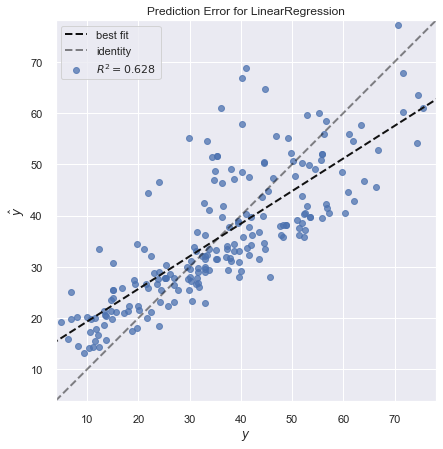

In [90]:
# view graphically
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import PredictionError
# Load Regression dataset
X, y = load_concrete()
# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
# Instantiate the linear model & visualizer
model2 = linear_model.LinearRegression()
visualizer2 = PredictionError(model2)
# Fit training data to the visualizer
visualizer2.fit(X_train, y_train)
# evaluate the model on the test data set
visualizer2.score(X_test, y_test)
visualizer2.show()